In [1]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('CaseCompetitionData.csv', sep=',')
data = data.loc[(data['purchase_price'] !='?') & (data['customer_income'] != '?') & (data['customer_distance_to_dealer'] != '?')]
data.drop(columns=['post_purchase_satisfaction', 'subsequent_purchases'], inplace=True)
data.head(5)

,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,customer_previous_purchase,customer_distance_to_dealer,vehicle_warranty_used
0,81690,DODGE,CHARGER,2010,10001 - 15000,0,0,21 - 30,20001 - 40000,U,0,9,1
1,109994,FORD,EXPLORER SPORT TRAC,2007,15001 - 20000,0,1,61 - 70,20001 - 40000,M,1,15,0
2,11399,BMW,328,2010,20001 - 25000,1,1,31 - 40,80001 - 100000,F,1,18,0
4,36685,CHEVROLET,CRUZE,2012,10001 - 15000,1,1,21 - 30,40001 - 60000,M,0,2,0
5,256143,MITSUBISHI,OUTLANDER SPORT,2011,15001 - 20000,0,1,21 - 30,40001 - 60000,M,0,12,0


['21 - 30' '61 - 70' '31 - 40' '41 - 50' '51 - 60' '101+' '71 - 80'
 '0 - 20' '81 - 90' '?' '91 - 100']
['20001 - 40000' '80001 - 100000' '40001 - 60000' '60001 - 80000'
 '120001 - 140000' '0 - 20000' '100001 - 120000' '160001 - 180000'
 '200001+' '140001 - 160000' '180001 - 200000']
['10001 - 15000' '15001 - 20000' '20001 - 25000' '25001 - 30000'
 '30001 - 35000' '0 - 5000' '45001 - 50000' '35001 - 40000' '5001 - 10000'
 '40001 - 45000' '55001 - 60000' '50001 - 55000' '60001 - 65000'
 '65001 - 70000' '70001 - 75000' '75001 - 80000' '85001 - 90000'
 '90001 - 95000' '80001 - 85000']


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder

In [4]:
data[['purchase_make', 'purchase_model', 'purchase_price','customer_age', 'customer_income', 'customer_gender']] = data[['purchase_make', 'purchase_model', 'purchase_price', 'customer_age', 'customer_income', 'customer_gender']].astype('category')
data['purchase_make_cat'] = data['purchase_make'].cat.codes
data['purchase_model_cat'] = data['purchase_model'].cat.codes # mapping categoricals to numerical values
data['customer_age_cat'] = data['customer_age'].cat.codes
data['customer_income_cat'] = data['customer_income'].cat.codes
data['customer_income_cat'] = data['customer_income'].cat.codes
data['purchase_price'] = data['purchase_price'].cat.codes
data['customer_distance_to_dealer'] = pd.to_numeric(data['customer_distance_to_dealer'])
data.drop(columns=['purchase_make', 'purchase_model', 'purchase_price', 'customer_age', 'customer_income', 'customer_gender', 'insert_num'], inplace=True)

In [13]:
features = data.drop(columns=['customer_previous_purchase'])
labels = data['customer_previous_purchase']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)




In [7]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv=5)
print(scores)
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())
print(cv.cv_results_)
print('BEST PARAMS: {}\n'.format(results.best_params_))

means = results.cv_results_['mean_test_score']
stds = results.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, results.cv_results_['params']):
    print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

C:\Users\999Na\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\999Na\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\999Na\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\999Na\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\999Na\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

[0.74962783 0.75141426 0.74732711 0.74929623 0.75050754]
{'mean_fit_time': array([ 0.24356127,  2.04387741,  4.09180512,  0.62852259,  5.51601949,
       11.15498824,  0.94460278,  9.5714375 , 19.72076759,  1.11748381,
       10.662286  , 21.40773716]), 'std_fit_time': array([0.00731701, 0.11411252, 0.16153265, 0.07707893, 0.08462361,
       0.37185312, 0.06791234, 0.7549086 , 1.5196368 , 0.07003978,
       0.07825436, 0.20208843]), 'mean_score_time': array([0.01557956, 0.09698529, 0.19587646, 0.02807693, 0.25377321,
       0.51297607, 0.0624156 , 0.59957247, 1.09955626, 0.07304492,
       0.68711247, 1.31082044]), 'std_score_time': array([0.0003076 , 0.00565795, 0.00527461, 0.00621716, 0.00610382,
       0.05839567, 0.0075601 , 0.06554372, 0.04486285, 0.00684195,
       0.05686224, 0.01601018]), 'param_max_depth': masked_array(data=[2, 2, 2, 10, 10, 10, 20, 20, 20, None, None, None],
             mask=[False, False, False, False, False, False, False, False,
                   False, F

NameError: name 'results' is not defined

In [8]:
rf = RandomForestClassifier(n_estimators=50, max_depth=10)
rf.fit(X_train, y_train)
scores = rf.score(X_val, y_val)
print(scores)
predictions = rf.predict_proba(X_test)
predictions2 = rf.predict(X_test)
print(metrics.accuracy_score(y_test, predictions2))
print(metrics.classification_report(y_test, predictions2, labels=[1,0]))
print(rf.feature_importances_)
print(X_test.columns)
print(metrics.confusion_matrix(y_test, predictions2, labels=[1,0]))

# looks like purchase year, trade in, financing, age, and income are the most telling for having a previous purchase

0.7864195926852243
0.784259590086725
              precision    recall  f1-score   support

           1       0.62      0.08      0.15     13709
           0       0.79      0.99      0.88     47865

    accuracy                           0.78     61574
   macro avg       0.70      0.53      0.51     61574
weighted avg       0.75      0.78      0.71     61574

[0.08061635 0.17982183 0.10876264 0.04574059 0.00688823 0.031013
 0.0441461  0.21847267 0.28453858]
Index(['purchase_vehicle_year', 'trade_in', 'vehicle_financing',
       'customer_distance_to_dealer', 'vehicle_warranty_used',
       'purchase_make_cat', 'purchase_model_cat', 'customer_age_cat',
       'customer_income_cat'],
      dtype='object')
[[ 1134 12575]
 [  709 47156]]


13709
5992
14622
61574
0.22245849464166895
0.22264267385584824
[6157, 6157, 6157, 6157, 6157, 6157, 6157, 6157, 6157, 6161]
0.22264267385584824


,purchase_vehicle_year,trade_in,vehicle_financing,customer_distance_to_dealer,vehicle_warranty_used,purchase_make_cat,purchase_model_cat,customer_age_cat,customer_income_cat,prob_yes,actual
295434,2008,0,1,5,0,5,334,2,7,0.052297,0
78292,2011,1,1,6,0,28,658,5,0,0.262080,0
143534,2011,1,1,71,0,9,257,3,1,0.349014,0
146514,2011,1,1,7,0,32,137,5,6,0.422948,0
199272,2011,0,1,7,1,28,504,3,8,0.155000,0


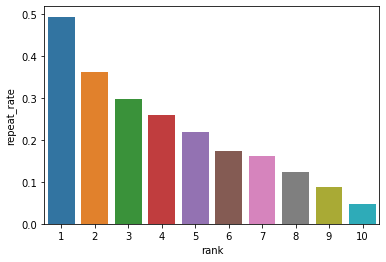

In [10]:
results = {'actual':y_test, 'prob_not':predictions[:,0], 'prob_yes':predictions[:,1]}
results = pd.DataFrame(results)
repeats = results[results['actual'] == 1]
print(len(repeats))
print(len(repeats[repeats['prob_yes'] >= .3]))
print(len(results[results['prob_yes'] >= .3]))
print(len(results))
print(results['prob_yes'].mean())
x = round(len(results)/10)

recreate = X_test
recreate['prob_yes'] = predictions[:,1]
recreate['actual'] = y_test
print(recreate['actual'].mean())

results.sort_values(by=['prob_yes'], ascending=False, inplace=True)
results.reset_index(inplace=True)
results.rename(columns={'index':'customer'}, inplace=True)
results
rank = []
repeat_rate = []
sales_rank_probs = []
lengths = []

for num in range(1,11):
    if num == 10:
        y = results.iloc[x*(num-1):]
        rr = len(results.iloc[x*(num-1):])
    else:
        y = results.iloc[x*(num-1):x*num]
        rr = len(results.iloc[x*(num-1):x*num])
    z = y['actual'].sum()/len(y)
    sales_rank_probs.append(results.iloc[x*(num-1)]['prob_yes'])
    rank.append(num)
    repeat_rate.append(z)
    lengths.append(rr)

sales_rank_probs.append(0)
sales_rank = {'rank':rank, 'repeat_rate':repeat_rate}
sales_rank = pd.DataFrame(sales_rank)
print(lengths)
sales_rank.head(10)
print(results['actual'].mean())
sns.barplot(x='rank', y='repeat_rate', data=sales_rank)
recreate.head()

In [ ]:
features = data.drop(columns=['customer_previous_purchase'])
labels = data['customer_previous_purchase']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
print(fpr)
print(tpr)
print(thresholds)

C:\Users\999Na\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.         0.         0.         ... 0.99995822 0.99995822 1.        ]
[0.00000000e+00 7.29447808e-05 2.18834342e-04 ... 9.99927055e-01
 1.00000000e+00 1.00000000e+00]
[1.77091097 0.77091097 0.7442213  ... 0.03246229 0.03184639 0.02795813]


In [15]:
logit__roc_auc1 = roc_auc_score(y_test, logreg.predict(X_test))


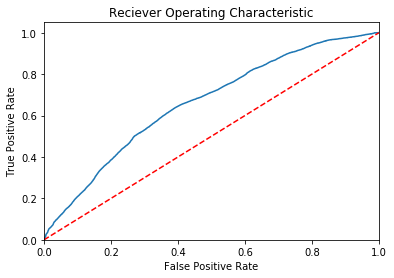

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (Sensitivity = %0.3f)' % logit__roc_auc1)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1.0])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic')
plt.show()

In [30]:
data = pd.read_csv('CaseCompetitionData.csv', sep=',')
data = data.loc[(data['purchase_price'] !='?') & (data['customer_income'] != '?') & (data['customer_distance_to_dealer'] != '?')]
data['customer_age'] = data['customer_age'].map({'21 - 30':25, '61 - 70':65, '31 - 40':35, '41 - 50':45, '51 - 60':55, '101+':102, '71 - 80':75,
 '0 - 20':10, '81 - 90':85, '?':'?', '91 - 100':95})
data['customer_income'] = data['customer_income'].map({'20001 - 40000':30000, '80001 - 100000':90000, '40001 - 60000':50000, '60001 - 80000':70000,
 '120001 - 140000':130000, '0 - 20000':10000, '100001 - 120000':110000, '160001 - 180000':170000,
 '200001+':220000, '140001 - 160000':150000, '180001 - 200000':190000})
data['purchase_price'] = data['purchase_price'].map({'10001 - 15000':12500, '15001 - 20000':17500, 
 '20001 - 25000':22500, '25001 - 30000':27500, '30001 - 35000':32500, '0 - 5000':2500, '45001 - 50000':47500, 
 '35001 - 40000':27500, '5001 - 10000':7500, '40001 - 45000':47500, '55001 - 60000':57500, '50001 - 55000':52500, 
 '60001 - 65000':62500, '65001 - 70000':67500, '70001 - 75000':72500, '75001 - 80000':77500, '85001 - 90000':87500,
 '90001 - 95000':92500, '80001 - 85000':82500})

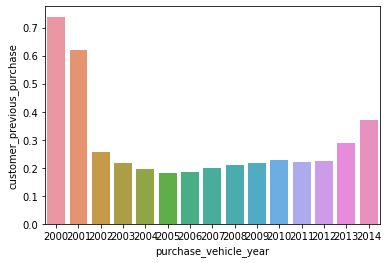

In [31]:
cust_pp_year_ratio = data.loc[data['purchase_vehicle_year'] >= 2000].groupby('purchase_vehicle_year')['customer_previous_purchase'].mean().to_frame().reset_index()
sns.barplot(x='purchase_vehicle_year',y='customer_previous_purchase', data=cust_pp_year_ratio)
# [2000, 2001, 2013, 2014] has the most significant correlation

   customer_previous_purchase  customer_distance_to_dealer
0                           0                     7.889848
1                           1                     7.988304


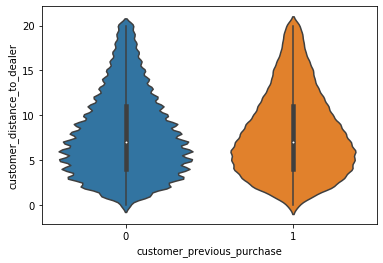

In [32]:
cust_dist = data[data['customer_distance_to_dealer'] != '?']
cust_dist['customer_distance_to_dealer'] = pd.to_numeric(cust_dist['customer_distance_to_dealer'])
cust_dist = cust_dist.loc[cust_dist['customer_distance_to_dealer'] <= 20]
sns.violinplot(x='customer_previous_purchase', y='customer_distance_to_dealer', data=cust_dist)
print(cust_dist.groupby('customer_previous_purchase')['customer_distance_to_dealer'].mean().to_frame().reset_index())

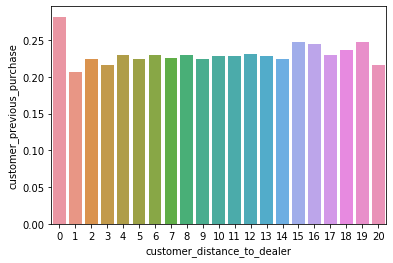

In [7]:
cust_dist_mean = cust_dist.groupby('customer_distance_to_dealer')['customer_previous_purchase'].mean().to_frame().reset_index()
sns.barplot(x='customer_distance_to_dealer', y='customer_previous_purchase', data=cust_dist_mean)
# really close people are likely to be repeat customers

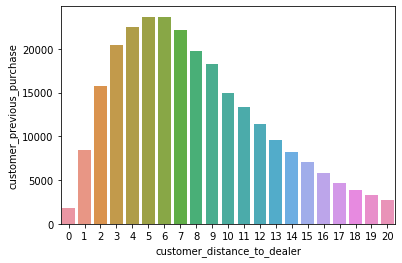

In [33]:
cust_dist_count = cust_dist.groupby('customer_distance_to_dealer')['customer_previous_purchase'].count().to_frame().reset_index()
sns.barplot(x='customer_distance_to_dealer', y='customer_previous_purchase', data=cust_dist_count)
# super close people are likely to repeat but there aren't a ton of them

['21 - 30' '61 - 70' '31 - 40' '41 - 50' '51 - 60' '101+' '71 - 80'
 '0 - 20' '81 - 90' '?' '91 - 100']
['20001 - 40000' '80001 - 100000' '40001 - 60000' '60001 - 80000'
 '120001 - 140000' '0 - 20000' '100001 - 120000' '160001 - 180000'
 '200001+' '140001 - 160000' '180001 - 200000']
['10001 - 15000' '15001 - 20000' '20001 - 25000' '25001 - 30000'
 '30001 - 35000' '0 - 5000' '45001 - 50000' '35001 - 40000' '5001 - 10000'
 '40001 - 45000' '55001 - 60000' '50001 - 55000' '60001 - 65000'
 '65001 - 70000' '70001 - 75000' '75001 - 80000' '85001 - 90000'
 '90001 - 95000' '80001 - 85000']


    customer_income  customer_previous_purchase
0             10000                    0.268625
1             30000                    0.112370
2             50000                    0.188871
3             70000                    0.252691
4             90000                    0.301484
5            110000                    0.319916
6            130000                    0.353410
7            150000                    0.372285
8            170000                    0.379870
9            190000                    0.386266
10           220000                    0.394018


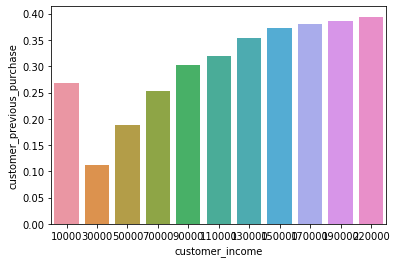

In [35]:
cust_income = data.groupby('customer_income')['customer_previous_purchase'].mean().to_frame().reset_index()
print(cust_income)
sns.barplot(x='customer_income', y='customer_previous_purchase', data=cust_income)
# 120k + likely

,customer_income,insert_num
0,10000,32912
1,30000,79799
2,50000,76555
3,70000,42451
4,90000,29441
5,110000,15676
6,130000,7405
7,150000,7505
8,170000,3696
9,190000,1631


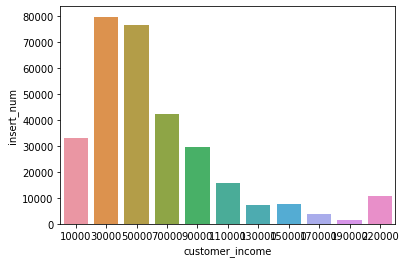

In [36]:
cust_income_dist = data_numeric.groupby('customer_income')['insert_num'].count().to_frame().reset_index()
sns.barplot(x='customer_income', y='insert_num', data=cust_income_dist)
cust_income_dist

,customer_age,customer_previous_purchase
0,10,0.044659
1,25,0.114982
2,35,0.231208
3,45,0.281080
4,55,0.287139
5,65,0.275553
6,75,0.218667
7,85,0.223133
8,95,0.312500
9,102,0.370607


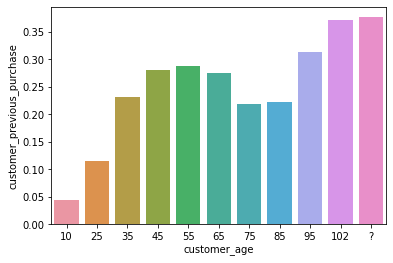

In [37]:
cust_age = data.groupby('customer_age')['customer_previous_purchase'].mean().to_frame().reset_index()
sns.barplot(x='customer_age', y='customer_previous_purchase', data=cust_age)
cust_age
# ? is high again, very old more likely, 40-70 likely

In [38]:
data.groupby('trade_in')['customer_previous_purchase'].mean().to_frame().reset_index()

,trade_in,customer_previous_purchase
0,0,0.161767
1,1,0.290469


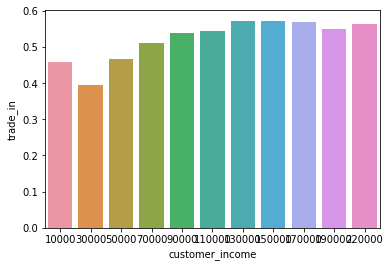

In [39]:
trade_income = data.groupby('customer_income')['trade_in'].mean().to_frame().reset_index()
sns.barplot(x='customer_income', y='trade_in', data=trade_income)

   vehicle_financing  customer_previous_purchase
0                  0                    0.348591
1                  1                    0.205581


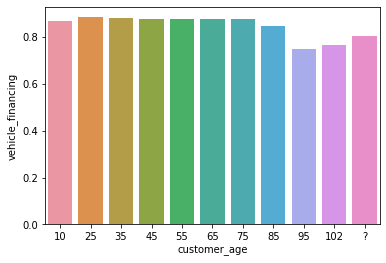

In [40]:
print(data.groupby('vehicle_financing')['customer_previous_purchase'].mean().to_frame().reset_index())
finance_income = data.groupby('customer_age')['vehicle_financing'].mean().to_frame().reset_index()
sns.barplot(x='customer_age', y='vehicle_financing', data=finance_income)

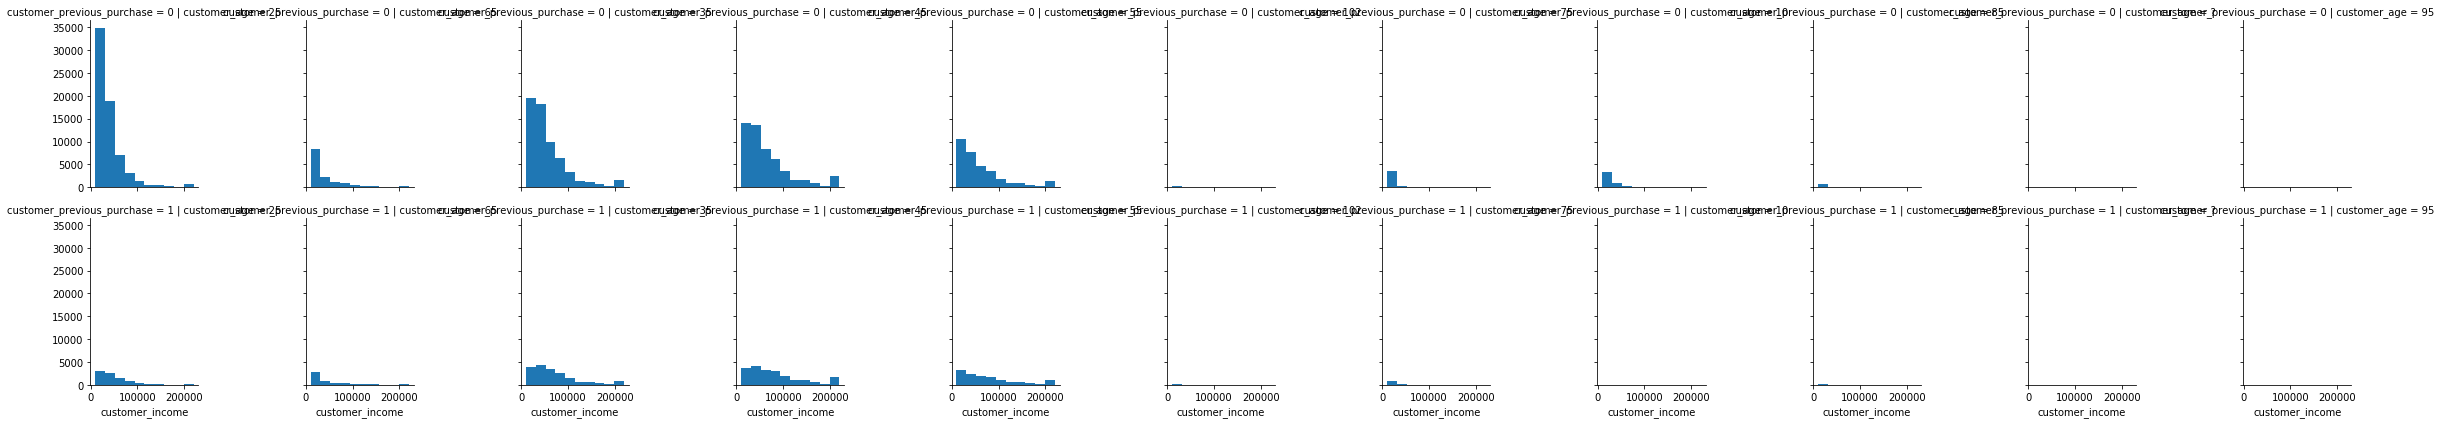

In [46]:
#ten = data.loc[data['customer_age'] == 10].groupby('customer_income')['customer_previous_purchase'].mean().to_frame().reset_index()
#twenty_five = data.loc[data['customer_age'] == 10].groupby('customer_income')['customer_previous_purchase'].mean().to_frame().reset_index()
#thirty_five = data.loc[data['customer_age'] == 10].groupby('customer_income')['customer_previous_purchase'].mean().to_frame().reset_index()
#forty_five = data.loc[data['customer_age'] == 10].groupby('customer_income')['customer_previous_purchase'].mean().to_frame().reset_index()
#fifty_five = data.loc[data['customer_age'] == 10].groupby('customer_income')['customer_previous_purchase'].mean().to_frame().reset_index()
#sixty_five = data.loc[data['customer_age'] == 10].groupby('customer_income')['customer_previous_purchase'].mean().to_frame().reset_index()
#seventy_five = data.loc[data['customer_age'] == 10].groupby('customer_income')['customer_previous_purchase'].mean().to_frame().reset_index()
#eighty_five = data.loc[data['customer_age'] == 10].groupby('customer_income')['customer_previous_purchase'].mean().to_frame().reset_index()
#ninety_five = data.loc[data['customer_age'] == 10].groupby('customer_income')['customer_previous_purchase'].mean().to_frame().reset_index()
#one_hundred = data.loc[data['customer_age'] == 10].groupby('customer_income')['customer_previous_purchase'].mean().to_frame().reset_index()
#unknown = data.loc[data['customer_age'] == 10].groupby('customer_income')['customer_previous_purchase'].mean().to_frame().reset_index()
import matplotlib.pyplot as plt
g = sns.FacetGrid(data, col='customer_age', row='customer_previous_purchase')
g = g.map(plt.hist, "customer_income")